# Disaster Dataset Visualization

In [ ]:
#Remove Stopwords

def remove_stopwords(sentence):
    """
    Removes a list of stopwords

    Args:
        sentence (string): sentence to remove the stopwords from

    Returns:
        sentence (string): lowercase sentence without the stopwords
    """
    # List of stopwords
    stopwords = ["a", "about", "above", "after","ago" ,"again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

    # Sentence converted to lowercase-only
    sentence = sentence.lower()

    words = sentence.split()
    no_words = [w for w in words if w not in stopwords]
    sentence = " ".join(no_words)

    return sentence
import pandas as pd
df = pd.read_csv("Disaster_dataset.csv")
df['Tweet']=df['Tweet'].apply(lambda x:remove_stopwords(x))

In [ ]:
# def remove_numbers(text):

#     import re

#     text_without_numbers = re.sub(r'\d+', '', text)

#     return text_without_numbers
# df["Tweet"]=df["Tweet"].apply(lambda x:remove_numbers(x))

In [ ]:

import nltk
from nltk.stem import WordNetLemmatizer

# Download WordNet from NLTK
nltk.download('wordnet')
import nltk
nltk.download('punkt')

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmi(sentence):


    # Tokenize the sentence into individual words
    words = nltk.word_tokenize(sentence)

    # Lemmatize each word to its base form
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join the lemmatized words back into a sentence
    lemmatized_sentence = " ".join(lemmatized_words)

    # Print the original and lemmatized sentences

    return  lemmatized_sentence
df['Tweet']=df['Tweet'].apply(lambda x:lemmi(x))
df["Tweet"]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0       earthquake preparedness never stop young stude...
1       uae two aid plane carrying 553 ton relief item...
2       football fan besiktas throw toy pitch honour t...
3       usgs report m085 earthquake 3km w anderson spr...
4       haytap turkey gt small miracle 21st day turkey...
                              ...                        
5540    _globalcrisis_ destruction colossal going get ...
5541    climatecerberus damage still chance must use u...
5542    _globalcrisis_ climatecerberus almost off chai...
5543    chaosdujour comey fbi spaghettimodel senstivet...
5544    warning florida will suffer direct hit categor...
Name: Tweet, Length: 5545, dtype: object

# Categorical Data Visualisation by Bar chart

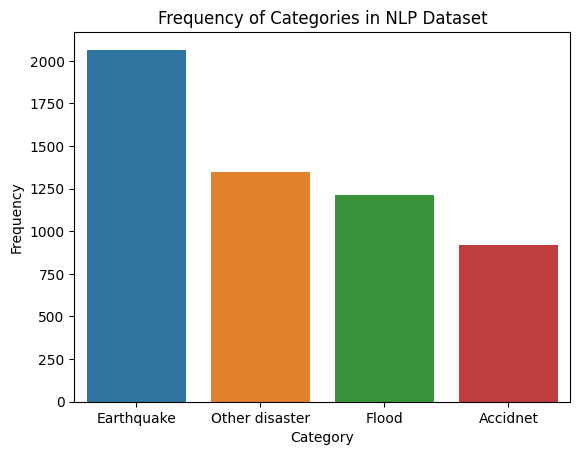

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get the frequency of each category
category_counts = df['Label'].value_counts()

# Create a bar chart
sns.barplot(x=category_counts.index, y=category_counts.values)
#plt.pie(category_counts.index, category_counts.values)


# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of Categories in NLP Dataset')

# Show the plot
plt.show()

# Categorical Data Visualisation by Tree map

In [ ]:
!pip install squarify
import pandas as pd
import matplotlib.pyplot as plt
import squarify


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


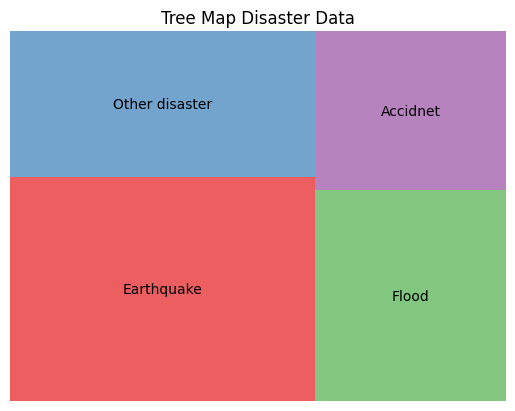

In [ ]:

# Assign a color to each category
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3']

# Create the tree map
squarify.plot(sizes=category_counts.values, label=category_counts.index, color=colors, alpha=.7)

# Add a title and remove the axis labels
plt.title('Tree Map Disaster Data')
plt.axis('off')

# Show the plot
plt.show()

# Visualization of Earhquake Frequent Words

In [ ]:
import nltk
import matplotlib.pyplot as plt

nltk.download('punkt')
# Sample text
#text = "This is a sample text to demonstrate how to create a bar chart."
#text = df.Tweet.tolist()
search=["Earthquake"]
drop_ind=df[~df['Label'].str.contains('|'.join(search), na=False)].index









[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
dfe=df.drop(drop_ind)

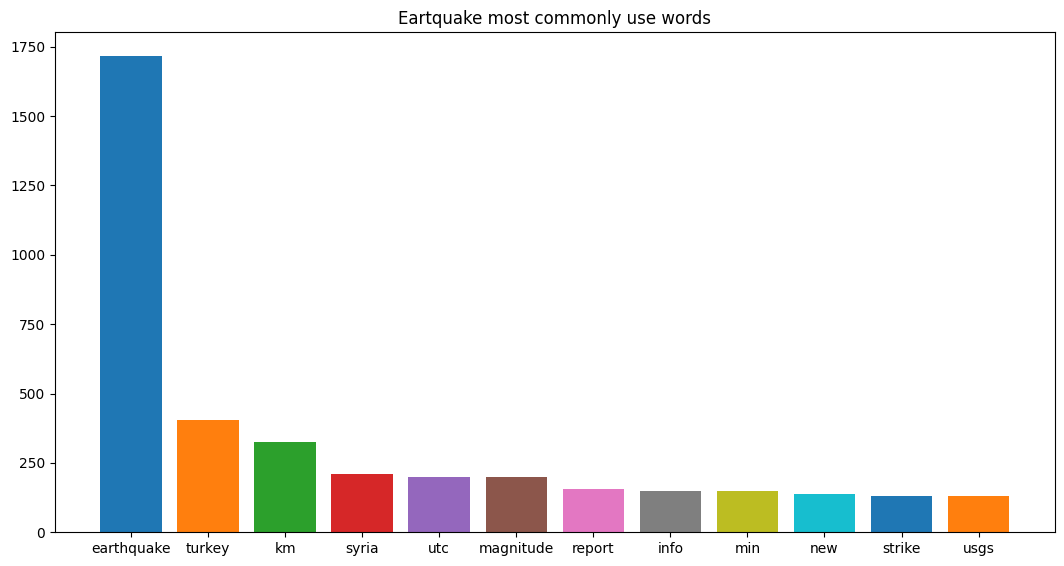

In [ ]:
import matplotlib.pyplot as plt
import nltk
from nltk.probability import FreqDist

# Tokenize the text into words
#Convert the text data into a single string using the join() method.

words = nltk.tokenize.word_tokenize(' '.join(dfe['Tweet'].tolist()))

# Create a frequency distribution of the words
freq_dist = FreqDist(words)

# Get the most common 10 words
most_common = freq_dist.most_common(12)
# Create a bar chart of the most common words with colors
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1])
plt.title("Eartquake most commonly use words")
words = [word[0] for word in most_common]
frequency = [word[1] for word in most_common]
for i in range(len(words)):
    ax.bar(words[i], frequency[i])
plt.show()

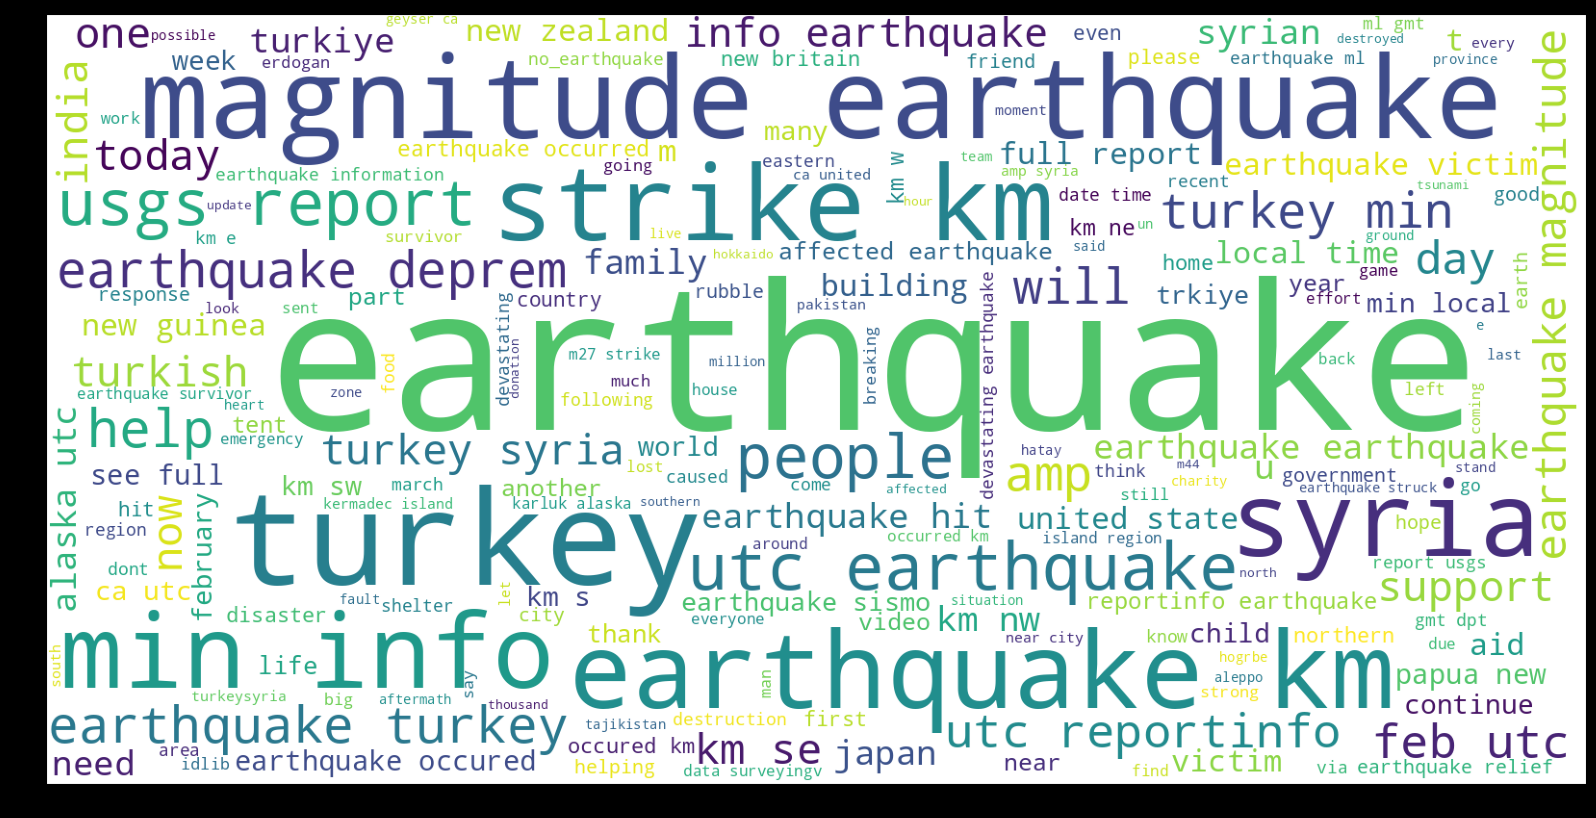

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(dfe['Tweet'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

# Visualization of Flood Frequent Words

In [ ]:
search=["Flood"]
drop_ind=df[~df['Label'].str.contains('|'.join(search), na=False)].index

In [ ]:
dff=df.drop(drop_ind)

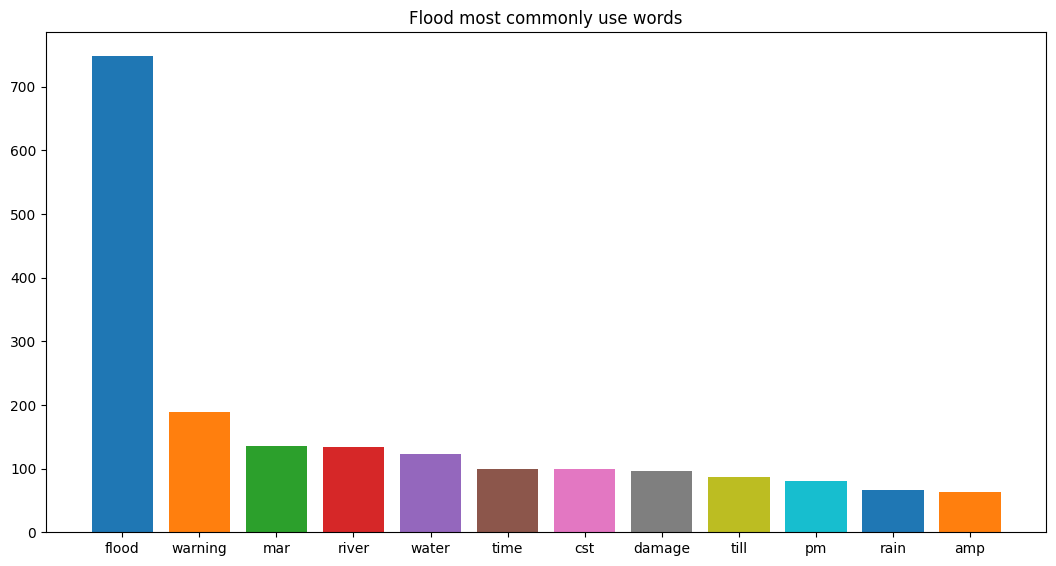

In [ ]:
import matplotlib.pyplot as plt
import nltk
from nltk.probability import FreqDist

# Tokenize the text into words
words = nltk.tokenize.word_tokenize(' '.join(dff['Tweet'].tolist()))

# Create a frequency distribution of the words
freq_dist = FreqDist(words)

# Get the most common 10 words
most_common = freq_dist.most_common(12)



# Create a bar chart of the most common words with colors
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1])
plt.title("Flood most commonly use words")
words = [word[0] for word in most_common]
frequency = [word[1] for word in most_common]
for i in range(len(words)):
    ax.bar(words[i], frequency[i])
plt.show()

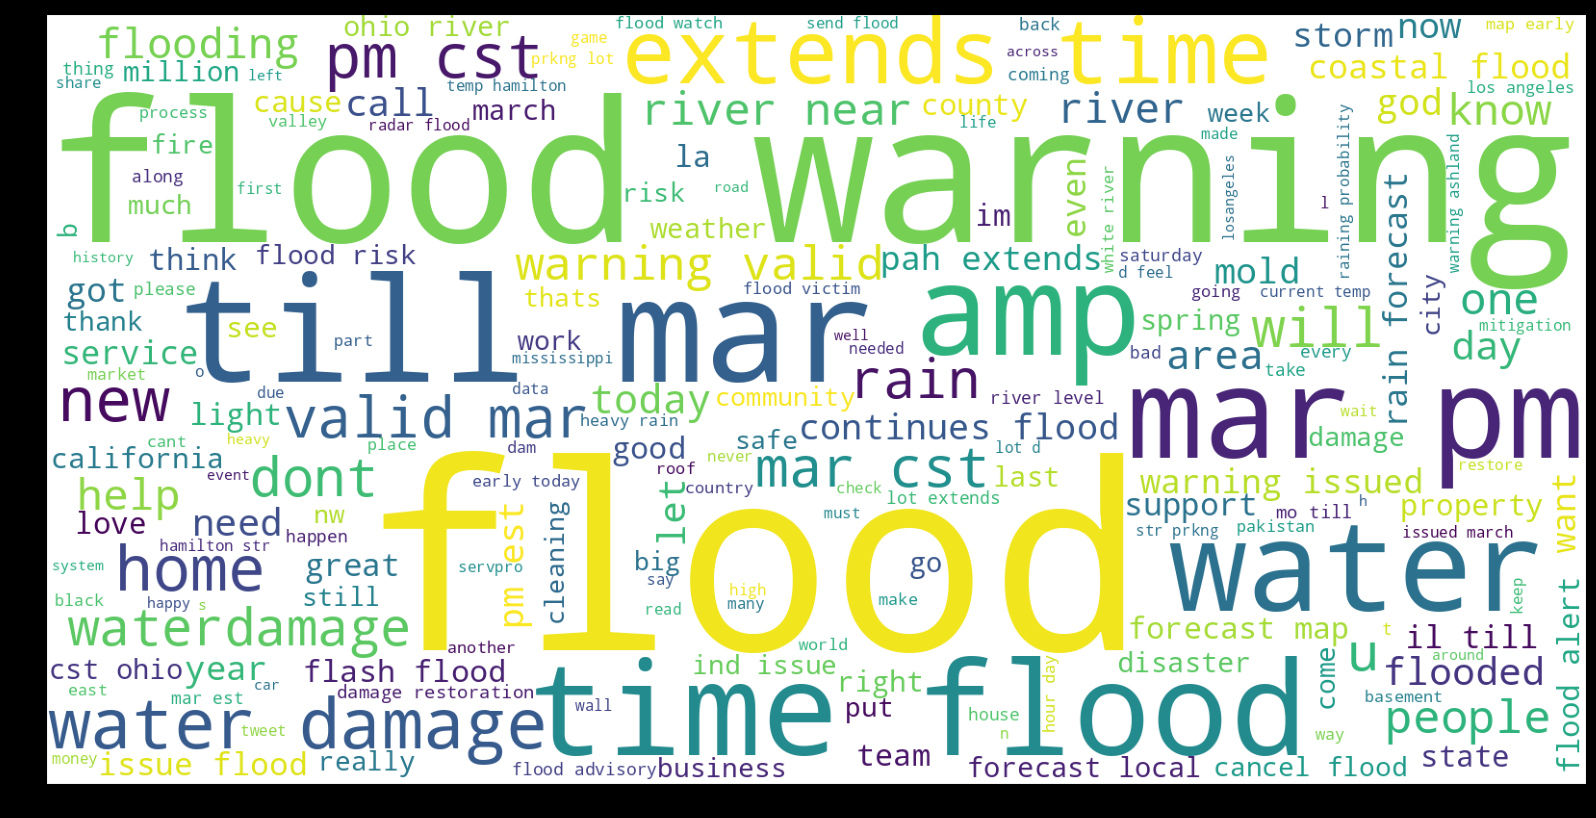

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(dff['Tweet'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

# Visualization of Accident Frequent Words

In [ ]:
search=["Accidnet"]
drop_ind=df[~df['Label'].str.contains('|'.join(search), na=False)].index

In [ ]:
dfa=df.drop(drop_ind)

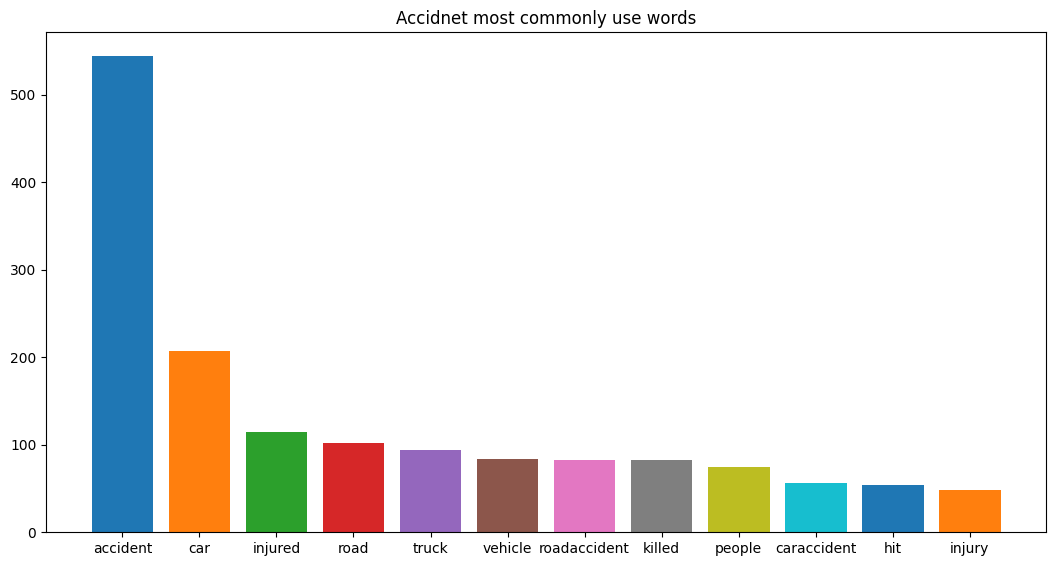

In [ ]:
import matplotlib.pyplot as plt
import nltk
from nltk.probability import FreqDist

# Tokenize the text into words
words = nltk.tokenize.word_tokenize(' '.join(dfa['Tweet'].tolist()))

# Create a frequency distribution of the words
freq_dist = FreqDist(words)

# Get the most common 10 words
most_common = freq_dist.most_common(12)



# Create a bar chart of the most common words with colors
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1])
plt.title("Accidnet most commonly use words")
words = [word[0] for word in most_common]
frequency = [word[1] for word in most_common]
for i in range(len(words)):
    ax.bar(words[i], frequency[i])
plt.show()

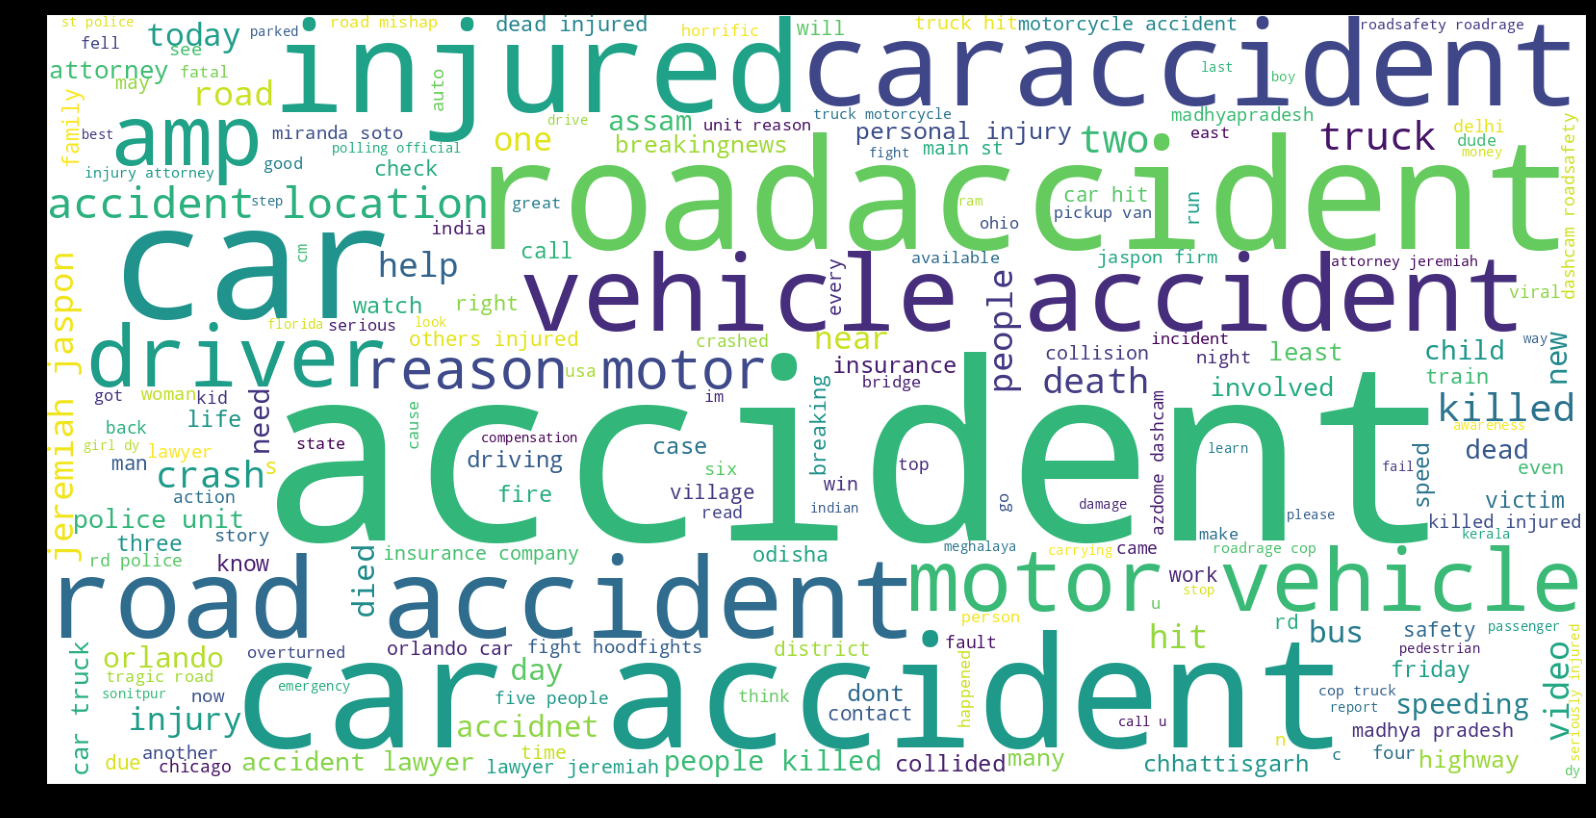

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(dfa['Tweet'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

# Visualization of Other Disaster Frequent Words

In [ ]:
search=["Other disaster"]
drop_ind=df[~df['Label'].str.contains('|'.join(search), na=False)].index

In [ ]:
dfo=df.drop(drop_ind)

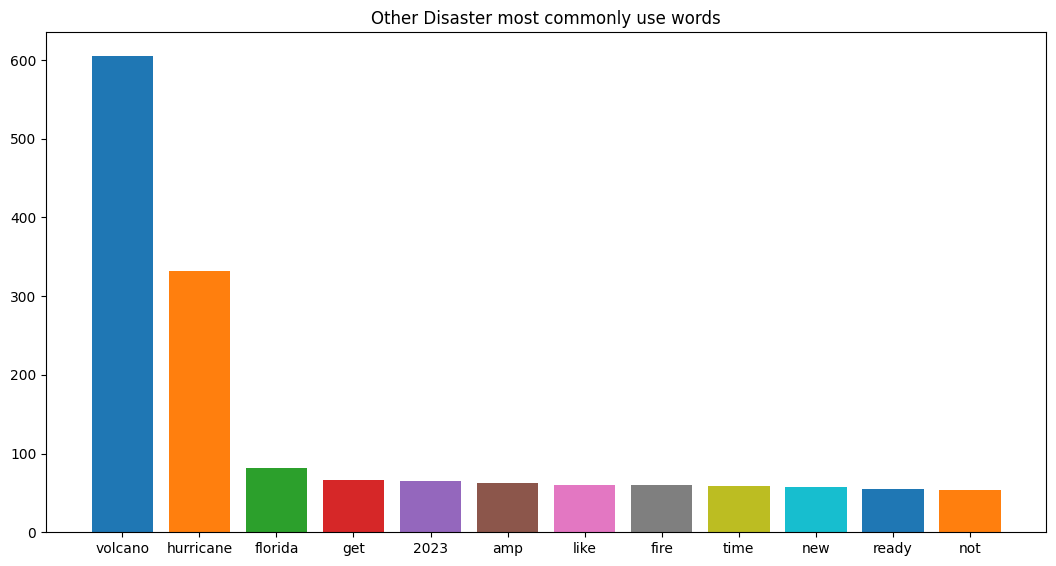

In [ ]:

# Tokenize the text into words
words = nltk.tokenize.word_tokenize(' '.join(dfo['Tweet'].tolist()))

# Create a frequency distribution of the words
freq_dist = FreqDist(words)

# Get the most common 10 words
most_common = freq_dist.most_common(12)

# Create a bar chart of the most common words with colors
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1])
plt.title("Other Disaster most commonly use words")
words = [word[0] for word in most_common]
frequency = [word[1] for word in most_common]
for i in range(len(words)):
    ax.bar(words[i], frequency[i])
plt.show()

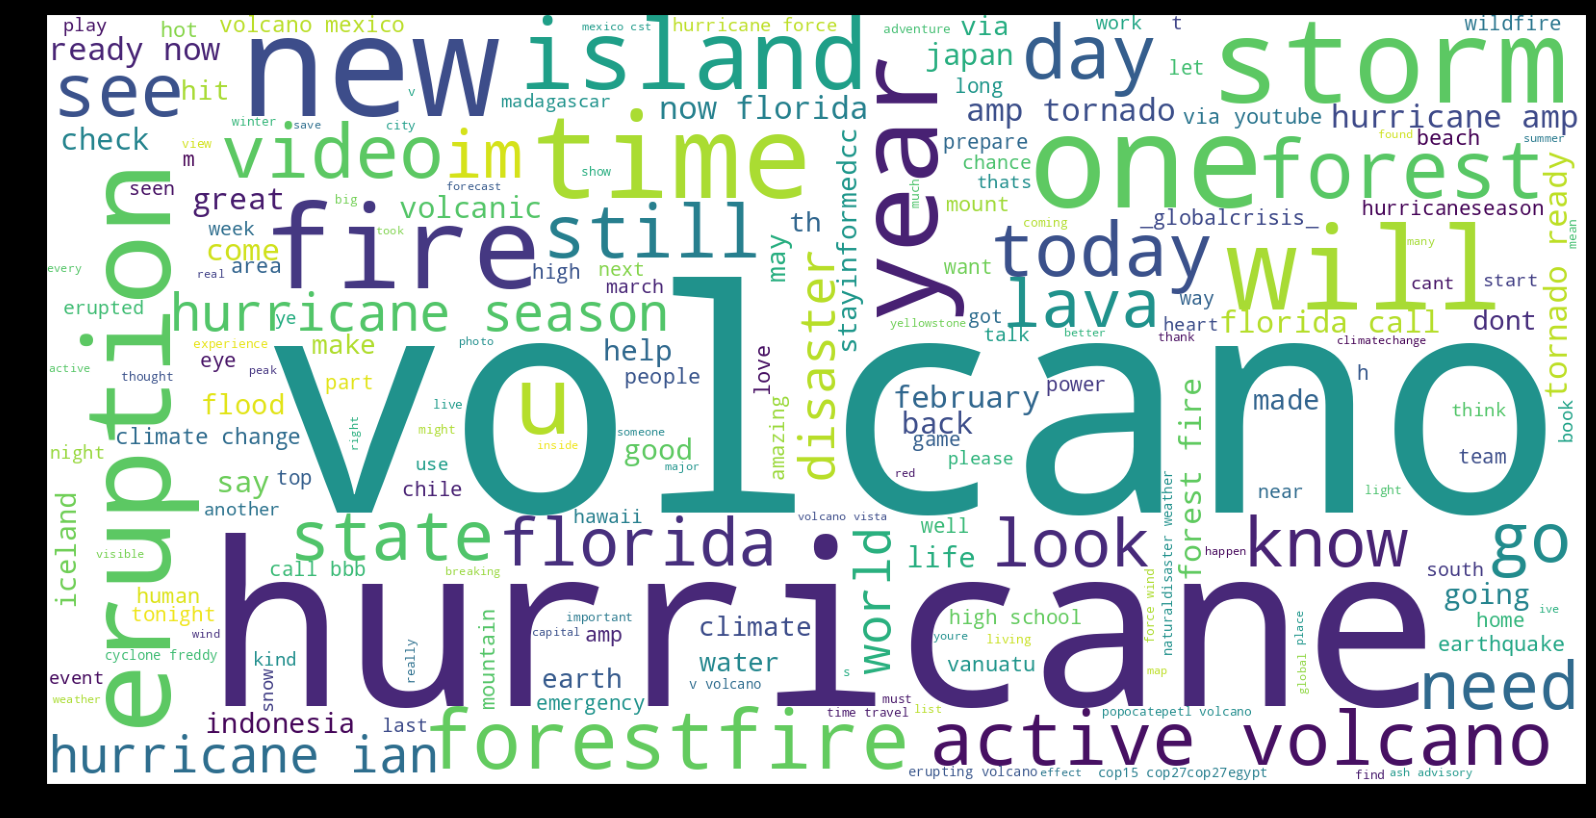

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(dfo['Tweet'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
